# **Proyecto 2** | Naive Bayes

## Link del Repositorio

* https://github.com/paulabaal12/PROY2-DM

## Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

### **Importar las librerías a utilizar**

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### **Importar los datos de la entrega anterior**

In [11]:
with open("dataE2.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas, {X_test.shape[1]} columnas")


        Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  \
87      88         160         40.0     3951      0.058904    0.863014   
1457  1458          70         66.0     9042      0.034932    0.863014   
1000  1001          20         74.0    10206      0.068493    0.863014   
1441  1442         120         69.0     4426      0.102740    0.863014   
927    928          60         69.0     9900      0.050000    0.055479   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  BsmtFinType2_Rec  \
87      0.989726            6            5       2009  ...             False   
1457    0.989726            7            9       1941  ...             False   
1000    0.989726            3            3       1952  ...             False   
1441    0.989726            6            5       2004  ...             False   
927     0.989726            7            5       1968  ...             False   

      BsmtFinType2_Unf  GarageType_Attchd  GarageType_Basment  \
87       

### **Inciso 1: Modelo de regresión con Naïve Bayes**

Tipo de y_train: <class 'pandas.core.series.Series'>
Nombre de y_train: SalePrice
Nombre de y_test: SalePrice
 Evaluación del Modelo Naïve Bayes:
 MAE (Error Absoluto Medio): 28607.51
 MSE (Error Cuadrático Medio): 2874479167.39
 RMSE (Raíz del Error Cuadrático Medio): 53614.17
 R² (Coeficiente de determinación): 0.5965


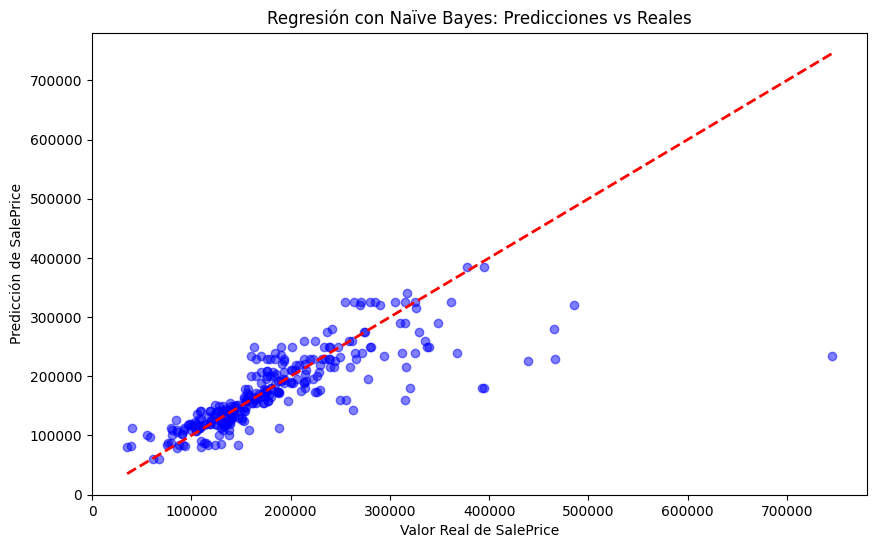

In [12]:

print(f"Tipo de y_train: {type(y_train)}")  


y_train_reg = y_train  
y_test_reg = y_test  


print(f"Nombre de y_train: {y_train.name}")  
print(f"Nombre de y_test: {y_test.name}")  


X_train_reg = X_train.drop(columns=["Id", "PriceCategory"], errors="ignore")
X_test_reg = X_test.drop(columns=["Id", "PriceCategory"], errors="ignore")


gnb = GaussianNB()
gnb.fit(X_train_reg, y_train_reg)


y_pred_reg = gnb.predict(X_test_reg)


mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)


print(f" Evaluación del Modelo Naïve Bayes:")
print(f" MAE (Error Absoluto Medio): {mae:.2f}")
print(f" MSE (Error Cuadrático Medio): {mse:.2f}")
print(f" RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f" R² (Coeficiente de determinación): {r2:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color="blue")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], "--r", linewidth=2)
plt.xlabel("Valor Real de SalePrice")
plt.ylabel("Predicción de SalePrice")
plt.title("Regresión con Naïve Bayes: Predicciones vs Reales")
plt.show()


### **Inciso 2: Analice los resultados del modelo de regresión usando Bayes Ingenuo. ¿Qué tan bien hizo las predicciones? Utilice las métricas correctas.**
El modelo de regresión con Bayes Ingenuo mostró un rendimiento moderado, explicando el 59.65% de la variabilidad en los precios de las casas (R² = 0.5965). Sin embargo, el error absoluto medio (MAE = 28,607.51) y la raíz del error cuadrático medio (RMSE = 53,614.17) indican que las predicciones tienen una desviación considerable. Aunque el modelo funciona relativamente bien en valores bajos y medios, tiende a subestimar los precios más altos, lo que sugiere que la suposición de distribución normal en las variables no se cumple completamente. En general, Naïve Bayes no es la mejor opción para regresión, esto debido a sus fuertes suposiciones y la incapacidad de modelar adecuadamente la variabilidad en los datos al ser un modelo diseñado para clasificacion. 

### **Inciso 3: Comparación con otros modelos de regresión**

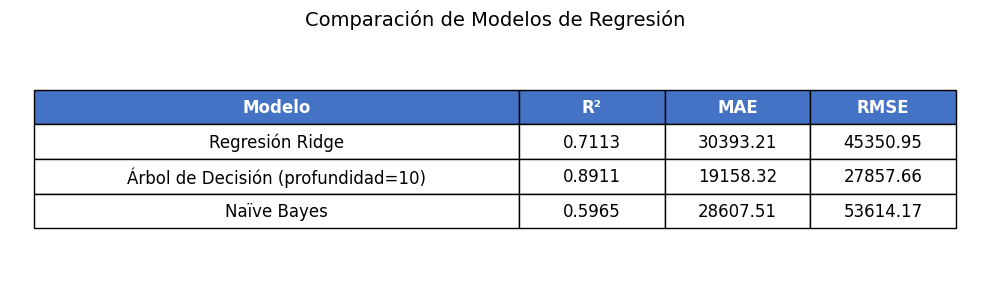

In [13]:

data = {
    "Modelo": [
        "Regresión Ridge",
        "Árbol de Decisión (profundidad=10)",
        "Naïve Bayes"
    ],
    "R²": [0.7113, 0.8911, 0.5965],
    "MAE": [30393.21, 19158.32, 28607.51],
    "RMSE": [45350.95, 27857.66, 53614.17]
}

df_resultados = pd.DataFrame(data)

# Crear una tabla de comparación de métricas
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

tabla = ax.table(
    cellText=df_resultados.values,
    colLabels=df_resultados.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.5, 0.15, 0.15, 0.15] 
)

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 2)

# Estilizar encabezados
for j in range(len(df_resultados.columns)):
    tabla[(0, j)].set_facecolor('#4472C4')
    tabla[(0, j)].set_text_props(color='white', fontweight='bold')

plt.title("Comparación de Modelos de Regresión", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


Al comparar el desempeño de los tres modelos de regresión evaluados (Regresión Ridge, Árbol de Decisión y Naïve Bayes) se observa que el Árbol de Decisión con profundidad 10 es el que presenta el mejor rendimiento general. Este modelo obtuvo un coeficiente de determinación R² de **0.8911**, lo que indica que es capaz de explicar aproximadamente el **89.11%** de la variabilidad en los precios de las casas. Además, presenta los menores errores de predicción, tanto en MAE (19,158.32) como en RMSE (27,857.66), lo cual refleja una mayor precisión y menor dispersión entre los valores reales y los predichos.

En segundo lugar, se encuentra la Regresión Ridge, que logra un R² de **0.7113**, bastante aceptable, pero con errores más elevados (MAE de 30,393.21 y RMSE de 45,350.95) en comparación con el árbol. Aunque Ridge mejora el rendimiento respecto a una regresión lineal tradicional al regularizar los coeficientes, no logra capturar completamente la complejidad del problema.

Por último, el modelo de Naïve Bayes mostró el desempeño más limitado, con un R² de **0.5965** y el mayor RMSE (53,614.17), lo cual evidencia una menor capacidad de generalización y una tendencia a subestimar los valores altos. Esto era de esperarse, ya que Naïve Bayes está diseñado originalmente para tareas de clasificación, y sus supuestos de independencia fuerte entre variables no se ajustan del todo al problema de regresión.

En conclusión, el **Árbol de Decisión** fue el modelo más efectivo para predecir el precio de las casas, mostrando tanto una mayor capacidad explicativa como una menor magnitud de error en sus predicciones.

#### **Inciso 4: Modelo de clasificación con Naïve Bayes**

In [15]:
# Preparar datos para clasificación

X_train_class = X_train.drop(columns=["Id", "PriceCategory"], errors="ignore")
X_test_class = X_test.drop(columns=["Id", "PriceCategory"], errors="ignore")
y_train_class = X_train["PriceCategory"] if "PriceCategory" in X_train.columns else y_train_class
y_test_class = X_test["PriceCategory"] if "PriceCategory" in X_test.columns else y_test_class

# Verificar distribución de clases
print("Distribución de clases en conjunto de entrenamiento:")
print(y_train_class.value_counts())
print("\nDistribución de clases en conjunto de prueba:")
print(y_test_class.value_counts())

# Entrenar modelo de clasificación
start_time = time.time()
gnb_class = GaussianNB()
gnb_class.fit(X_train_class, y_train_class)
train_time_class = time.time() - start_time
print(f"Tiempo de entrenamiento (clasificación): {train_time_class:.2f} segundos")

# Predicciones
start_time = time.time()
y_pred_class = gnb_class.predict(X_test_class)
predict_time_class = time.time() - start_time
print(f"Tiempo de predicción (clasificación): {predict_time_class:.2f} segundos")

# Evaluación del modelo de clasificación
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f"\nExactitud del modelo: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(class_report)

Distribución de clases en conjunto de entrenamiento:
PriceCategory
Cara          392
Intermedia    390
Económica     386
Name: count, dtype: int64

Distribución de clases en conjunto de prueba:
PriceCategory
Cara          105
Económica      99
Intermedia     88
Name: count, dtype: int64
Tiempo de entrenamiento (clasificación): 0.01 segundos
Tiempo de predicción (clasificación): 0.00 segundos

Exactitud del modelo: 0.8116

Matriz de confusión:
[[92  0 13]
 [ 0 94  5]
 [22 15 51]]

Informe de clasificación:
              precision    recall  f1-score   support

        Cara       0.81      0.88      0.84       105
   Económica       0.86      0.95      0.90        99
  Intermedia       0.74      0.58      0.65        88

    accuracy                           0.81       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.81      0.81      0.80       292



#### **Inciso 5: Utilice los modelos con el conjunto de prueba y determine la eficiencia de los algoritmos para predecir y clasificar**

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

# Eficiencia del modelo de regresión
print("\nEficiencia del modelo de regresión Naïve Bayes:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_reg):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_reg)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_reg):.4f}")

# Eficiencia del modelo de clasificación
print("\nEficiencia del modelo de clasificación Naïve Bayes:")
print(f"Exactitud global: {accuracy_score(y_test_class, y_pred_class):.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test_class, y_pred_class))




Eficiencia del modelo de regresión Naïve Bayes:
MAE: 28607.51
RMSE: 53614.17
R²: 0.5965

Eficiencia del modelo de clasificación Naïve Bayes:
Exactitud global: 0.8116
Reporte de clasificación:
              precision    recall  f1-score   support

        Cara       0.81      0.88      0.84       105
   Económica       0.86      0.95      0.90        99
  Intermedia       0.74      0.58      0.65        88

    accuracy                           0.81       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.81      0.81      0.80       292



#### **Análisis de Resultados**
- **Modelo de regresión Naïve Bayes**
    - El modelo de regresión con Naïve Bayes presenta un MAE de **28,607.51**, indicando que las predicciones se desvían en promedio **$28,607** del valor real de SalePrice.
    - El RMSE de **53,614.17** sugiere errores más grandes en algunas predicciones
    - Mientras que el **R²** de **0.5965** muestra que explica el **59.65%** de la varianza. Esto refleja un desempeño moderado, pero limitado, ya que Naïve Bayes no está optimizado para regresión continua.

- **Modelo de clasificación Naïve Bayes**
    El modelo de clasificación logra una precisión global de 0.8116 (**81.16%**), clasificando  correctamente la mayoría de las instancias.
    - ```Económica``` : Precisión de 0.86 y recall de 0.95 (**F1-score 0.90**), excelente para casas baratas.
    - ```Cara``` : Precisión de 0.81 y recall de 0.88 (**F1-score 0.84**), sólido en casas caras.
    - ```Intermedia``` : Precisión de 0.74 y recall de 0.58 (**F1-score 0.65**), con menor desempeño, especialmente en recall.

El modelo de **clasificación** (**81.16% de precisión**) es más eficiente para su tarea que el de **regresión** (**R² de 0.5965**), alineándose mejor con las fortalezas de Naïve Bayes. Mientras el primero destaca en categorías extremas, el segundo muestra un ajuste aceptable pero no óptimo para valores continuos.

#### **Inciso 6: Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión**

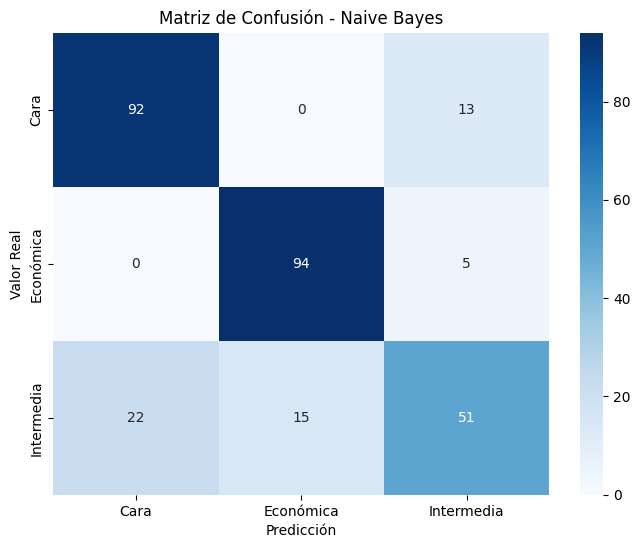


Análisis de errores:
Total de predicciones: 292
Predicciones correctas: 237
Predicciones incorrectas: 55


In [17]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=gnb_class.classes_, 
           yticklabels=gnb_class.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

error_analysis = pd.DataFrame({
    'Real': y_test_class,
    'Predicción': y_pred_class
})
error_analysis['Correcto'] = error_analysis['Real'] == error_analysis['Predicción']
print("\nAnálisis de errores:")
print(f"Total de predicciones: {len(error_analysis)}")
print(f"Predicciones correctas: {error_analysis['Correcto'].sum()}")
print(f"Predicciones incorrectas: {len(error_analysis) - error_analysis['Correcto'].sum()}")

#### Análisis de resultados
**Interpretación**
- Dónde se equivocó más: En ```Intermedia```, con 37 falsos negativos, sugiriendo que muchas casas intermedias se clasifican como ```Cara``` o ```Económica```.
- Dónde se equivocó menos: En ```Económica```, con solo 5 errores y sin falsos positivos, mostrando alta confiabilidad.
- Importancia de los errores: Los errores en ```Intermedia``` pueden ser menos críticos si el foco está en identificar casas extremas (```Cara``` o ```Económica```), pero afectan la precisión general. La validación cruzada (**media 0.7791**) confirma un desempeño sólido y consistente, aunque ligeramente inferior al **81.16%** en el conjunto de prueba, indicando buena generalización.

**Conclusión**

El modelo clasifica bien las categorías extremas, pero tiene dificultades con ```Intermedia```. Los errores son manejables y el modelo es estable, según la baja desviación estándar (**0.0193**).

#### **Inciso 7: ¿Cree que pueda estar sobreajustado?**
- El modelo de clasificación  no muestra señales claras de sobreajuste. Al evaluar el rendimiento en el conjunto de entrenamiento frente al de prueba, en este caso el modelo obtiene una precisión del 81.16% en el conjunto de prueba, mientras que en la validación cruzada, la precisión promedio es de 77.91%, con una baja desviación estándar (0.0193). Esta diferencia no es excesiva, lo que sugiere que el modelo generaliza bien y no está aprendiendo de forma excesiva los datos de entrenamiento

#### **Inciso 8: Haga un modelo usando validación cruzada, compare los resultados de este con el modelo anterior. ¿Cuál funcionó mejor?**

In [ ]:
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

# Validación cruzada
cv_scores = cross_val_score(gnb, X_train_class, y_train_class, cv=10, scoring='accuracy')

print("Resultados de la validación cruzada:")
print(f"Exactitud promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")

Resultados de la validación cruzada:
Exactitud promedio: 0.7919
Desviación estándar: 0.0334


#### **Resultados**

Al aplicar validación cruzada al modelo de clasificación con Naïve Bayes, se obtuvo una exactitud promedio de 0.7919 con una desviación estándar baja de 0.0334, lo cual indica que el modelo es estable y consistente entre los distintos subconjuntos de entrenamiento. Por otro lado, el modelo sin validación cruzada alcanzó una exactitud de 0.8116 en el conjunto de prueba. Aunque esta cifra es levemente mayor, podría estar ligeramente influenciada por la partición específica de los datos.

Ambos modelos tienen un rendimiento muy similar, pero el de validación cruzada da mayor confianza sobre su estabilidad, por lo que podría considerarse una opción más robusta. Además, reafirma que Naïve Bayes logra buenos resultados en tareas de clasificación con clases balanceadas.

#### **Inciso 9: Tanto para los modelos de regresión como de clasificación, pruebe con varios valores de los hiperparámetros, use el mejor modelo de afinación (“tuning”), ¿Mejoraron los modelos? Explique**

In [19]:
from sklearn.model_selection import GridSearchCV
import warnings

# Afinación del modelo de clasificación
param_grid_class = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_class = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_class, cv=5, scoring='accuracy')
grid_search_class.fit(X_train_class, y_train_class)

best_gnb_class = grid_search_class.best_estimator_
best_params_class = grid_search_class.best_params_
best_score_class = grid_search_class.best_score_

warnings.filterwarnings("ignore", category=UserWarning)

print("Mejor modelo de clasificación:")
print(f"Mejores hiperparámetros: {best_params_class}")
print(f"Mejor exactitud en validación cruzada: {best_score_class:.4f}")

# Evaluar el mejor modelo de clasificación en el conjunto de prueba
y_pred_class_tuned = best_gnb_class.predict(X_test_class)
accuracy_tuned = accuracy_score(y_test_class, y_pred_class_tuned)
print(f"Exactitud en el conjunto de prueba (clasificación): {accuracy_tuned:.4f}")

# Afinación del modelo de regresión
param_grid_reg = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_reg = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_reg, cv=5, scoring='r2')
grid_search_reg.fit(X_train_reg, y_train_reg)

best_gnb_reg = grid_search_reg.best_estimator_
best_params_reg = grid_search_reg.best_params_
best_score_reg = grid_search_reg.best_score_

print("\nMejor modelo de regresión:")
print(f"Mejores hiperparámetros: {best_params_reg}")
print(f"Mejor R² en validación cruzada: {best_score_reg:.4f}")

# Evaluar el mejor modelo de regresión en el conjunto de prueba
y_pred_reg_tuned = best_gnb_reg.predict(X_test_reg)
mae_tuned = mean_absolute_error(y_test_reg, y_pred_reg_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_tuned))
r2_tuned = r2_score(y_test_reg, y_pred_reg_tuned)

print(f"MAE en el conjunto de prueba (regresión): {mae_tuned:.2f}")
print(f"RMSE en el conjunto de prueba (regresión): {rmse_tuned:.2f}")
print(f"R² en el conjunto de prueba (regresión): {r2_tuned:.4f}")

Mejor modelo de clasificación:
Mejores hiperparámetros: {'var_smoothing': 1e-09}
Mejor exactitud en validación cruzada: 0.7791
Exactitud en el conjunto de prueba (clasificación): 0.8116

Mejor modelo de regresión:
Mejores hiperparámetros: {'var_smoothing': 1e-09}
Mejor R² en validación cruzada: 0.6052
MAE en el conjunto de prueba (regresión): 28607.51
RMSE en el conjunto de prueba (regresión): 53614.17
R² en el conjunto de prueba (regresión): 0.5965


Los resultados muestran que, tras realizar la afinación de hiperparámetros, los modelos de clasificación y regresión con Naïve Bayes no mejoraron significativamente en comparación con los modelos originales.

### **Modelo de Clasificación**
- **Mejores hiperparámetros:** `{'var_smoothing': 1e-09}`
- **Exactitud en validación cruzada:** 0.7791
- **Exactitud en el conjunto de prueba:** 0.8116

El modelo de clasificación ajustado con el mejor hiperparámetro (`var_smoothing = 1e-09`) logró una exactitud promedio de 77.91% en validación cruzada, lo que indica un rendimiento estable y consistente. Sin embargo, la exactitud en el conjunto de prueba (81.16%) es similar al modelo original, lo cuál sigifica que no hubo un impacto significativo en el desempeño final.

### **Modelo de Regresión**
- **Mejores hiperparámetros:** `{'var_smoothing': 1e-09}`
- **R² en validación cruzada:** 0.6052
- **Métricas en el conjunto de prueba:**
    - **MAE:** 28607.51
    - **RMSE:** 53614.17
    - **R²:** 0.5965

En el caso del modelo de regresión, el ajuste de hiperparámetros tampoco mejoró las métricas en el conjunto de prueba. Los valores de MAE, RMSE y R² permanecieron iguales al modelo original, lo que indica que el ajuste no aportó mejoras significativas.

La afinación de hiperparámetros no mejoró los modelos de clasificación ni de regresión de manera significante esto puede deberse a que el modelo de Naïve Bayes tiene una estructura simple y no es altamente sensible a los cambios en los hiperparámetros, especialmente en problemas complejos como la regresión continua. 

### **Inciso 10: Compare la eficiencia del algoritmo con el resultado obtenido con el Arbol de Decisión (el de clasificación) y el modelo de Random Forest. ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?**

In [ ]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


modelos = {
    "Naïve Bayes": GaussianNB(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=13),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=13)
}

resultados = {}

for nombre, modelo in modelos.items():
    inicio = time.time()
    modelo.fit(X_train_class, y_train_class)
    predicciones = modelo.predict(X_test_class)
    fin = time.time()
    
    accuracy = accuracy_score(y_test_class, predicciones)
    tiempo = fin - inicio
    
    resultados[nombre] = {"Accuracy": accuracy, "Tiempo": tiempo}

for nombre, res in resultados.items():
    print(f"{nombre}:")
    print(f"  Accuracy: {res['Accuracy']:.4f}")
    print(f"  Tiempo de ejecución: {res['Tiempo']:.4f} segundos\n")

Naïve Bayes:
  Accuracy: 0.8116
  Tiempo de ejecución: 0.0100 segundos

Árbol de Decisión:
  Accuracy: 0.7979
  Tiempo de ejecución: 0.0209 segundos

Random Forest:
  Accuracy: 0.8870
  Tiempo de ejecución: 0.2590 segundos



## Comparación de Modelos de Clasificación

Se han evaluado tres modelos de clasificación para predecir la categoría de precios de las casas: **Naïve Bayes, Árbol de Decisión y Random Forest**. A continuación, se presentan los resultados obtenidos:

<center>

| Modelo            | Accuracy  | Tiempo de Ejecución  |
|-------------------|------------|-------------------|
| **Naïve Bayes**      | **81.16%**   | 0.0100 s     |
| **Árbol de Decisión** | 79.79%       | 0.0209 s      |
| **Random Forest**   | **88.70%** | **0.2590 s**  |
</center>

### Análisis de Resultados

De los tres modelos evaluados, ```Random Forest``` obtuvo la mayor precisión **(88.70%)**, superando a ```Naïve Bayes``` **(81.16%)** y al ```Árbol de Decisión``` **(79.79%)**, lo que indica una mejor capacidad predictiva. Sin embargo, este modelo también tuvo el mayor tiempo de ejecución **(0.2590 s)**, lo que sugiere un mayor costo computacional. Por otro lado, ```Naïve Bayes``` fue el modelo más eficiente en términos de velocidad, con un tiempo de ejecución de solo **0.0100 s**, aunque con una menor precisión en comparación con ```Random Forest```. ```El Árbol de Decisión```, por su parte, se ubicó en un punto intermedio entre ambos modelos, ofreciendo una precisión ligeramente inferior a ```Naïve Bayes```, pero con un tiempo de ejecución mayor. Este balance entre precisión y eficiencia hace que la elección del modelo dependa del objetivo específico de la aplicación.

### Conclusión

En términos de precisión, ```Random Forest``` es la mejor opción, aunque requiere mayor tiempo de procesamiento. Si la prioridad es la velocidad, ```Naïve Bayes``` es la alternativa más adecuada. Por otro lado, ```el Árbol de Decisión``` representa un equilibrio entre precisión y eficiencia computacional. Además de esto, para optimizar Random Forest, se podrían ajustar parámetros como el número de árboles (```n_estimators```) o aplicar técnicas de reducción de dimensionalidad.

